In [2]:
import os
import cv2
import uuid
import numpy as np
import tensorflow as tf
from PIL import Image
from skimage import io, transform
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [3]:
# img = cv2.imread(img_path)
# cropped_img = crop_and_resize(img_path)
# flipped_left_right_img = flip_left_right(cropped_img)
# flipped_up_down_img = flip_up_down(cropped_img)
# rotated_img = random_rotation(cropped_img)

# # Create a figure to display the images
# plt.figure(figsize=(12, 8))

# # Plot the original image
# plt.subplot(2, 3, 1)
# plt.title('Original Image')
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.axis('off')

# # Assuming `cropped_resized_img` is the single-channel grayscale image
# # Plot the cropped and resized image
# plt.subplot(2, 3, 2)
# plt.title('Cropped and Resized Image')
# plt.imshow(cropped_img.numpy(), cmap='gray')
# plt.axis('off')

# # Plot the flipped left-right image
# plt.subplot(2, 3, 3)
# plt.title('Flipped Left-Right Image')
# plt.imshow(flipped_left_right_img.numpy(), cmap='gray')
# plt.axis('off')

# # Plot the flipped up-down image
# plt.subplot(2, 3, 4)
# plt.title('Flipped Up-Down Image')
# plt.imshow(flipped_up_down_img.numpy(), cmap='gray')
# plt.axis('off')

# plt.subplot(2, 3, 5)
# plt.title('Rotated Image')
# plt.imshow(rotated_img.numpy(), cmap='gray')
# plt.axis('off')

# # Show the plot
# plt.tight_layout()
# plt.show()

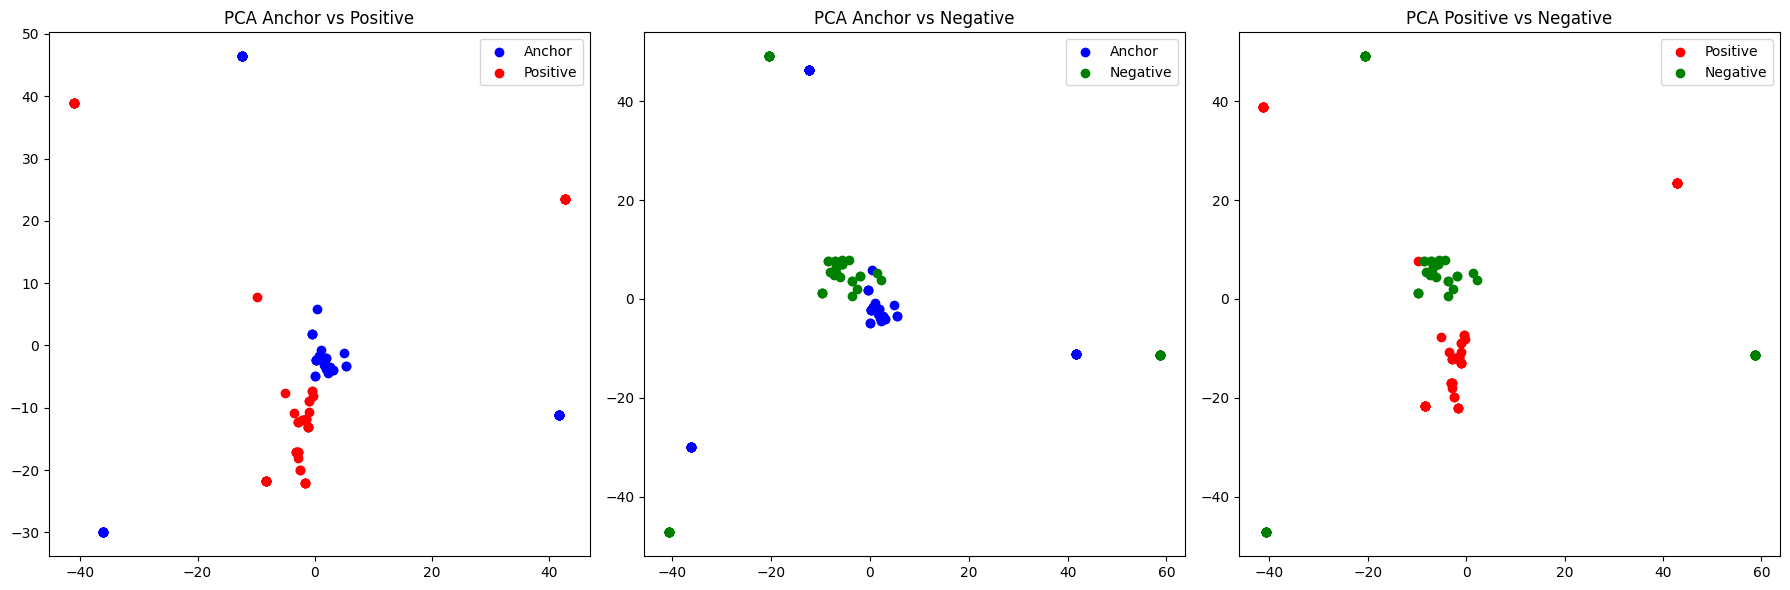

In [7]:
# Function to load and preprocess image data
def load_and_preprocess_data(directory):
    image_paths = os.listdir(directory)
    image_paths = [os.path.join(directory, image_path) for image_path in image_paths if image_path.endswith('.jpg')]

    images = []
    for path in image_paths:
        images.append(io.imread(path))

    preprocessed_images = [transform.resize(image, (224, 224)) for image in images]  # Resize for uniform dimensions

    # Convert images to flattened vectors
    preprocessed_data = np.array([image.flatten() for image in preprocessed_images])

    return preprocessed_data

# Experiment Alpha
# anchor_data = load_and_preprocess_data('/content/drive/MyDrive/Colab Notebooks/Final/data/alpha/sigma_non_augmented/training/anchor')
# positive_data = load_and_preprocess_data('/content/drive/MyDrive/Colab Notebooks/Final/data/alpha/sigma_non_augmented/training/positive')
# negative_data = load_and_preprocess_data('/content/drive/MyDrive/Colab Notebooks/Final/data/alpha/sigma_non_augmented/training/negative')

# Experiment Beta
# anchor_data = load_and_preprocess_data('/content/drive/MyDrive/Colab Notebooks/Final/data/beta/sigma_augmented/training/anchor')
# positive_data = load_and_preprocess_data('/content/drive/MyDrive/Colab Notebooks/Final/data/beta/sigma_augmented/training/positive')
# negative_data = load_and_preprocess_data('/content/drive/MyDrive/Colab Notebooks/Final/data/beta/sigma_augmented/training/negative')

# Experiment Charlie
# anchor_data = load_and_preprocess_data('/content/drive/MyDrive/Colab Notebooks/Final/data/charlie/sigma_non_augmented/training/anchor')
# positive_data = load_and_preprocess_data('/content/drive/MyDrive/Colab Notebooks/Final/data/charlie/sigma_non_augmented/training/positive')
# negative_data = load_and_preprocess_data('/content/drive/MyDrive/Colab Notebooks/Final/data/charlie/sigma_non_augmented/training/negative')

# Experiment Delta
# anchor_data = load_and_preprocess_data('/content/drive/MyDrive/Colab Notebooks/Final/data/delta/sigma_augmented/training/anchor')
# positive_data = load_and_preprocess_data('/content/drive/MyDrive/Colab Notebooks/Final/data/delta/sigma_augmented/training/positive')
# negative_data = load_and_preprocess_data('/content/drive/MyDrive/Colab Notebooks/Final/data/delta/sigma_augmented/training/negative')

# Apply PCA for dimensionality reduction
pca_anchor = PCA(n_components=2)
pca_positive = PCA(n_components=2)
pca_negative = PCA(n_components=2)

pca_anchor_result = pca_anchor.fit_transform(anchor_data)
pca_positive_result = pca_positive.fit_transform(positive_data)
pca_negative_result = pca_negative.fit_transform(negative_data)

# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot the first PCA scatter plot (Anchor vs Positive)
axs[0].scatter(pca_anchor_result[:, 0], pca_anchor_result[:, 1], label='Anchor', color='blue')
axs[0].scatter(pca_positive_result[:, 0], pca_positive_result[:, 1], label='Positive', color='red')
axs[0].set_title("PCA Anchor vs Positive")
axs[0].legend()

# Plot the second PCA scatter plot (Anchor vs Negative)
axs[1].scatter(pca_anchor_result[:, 0], pca_anchor_result[:, 1], label='Anchor', color='blue')
axs[1].scatter(pca_negative_result[:, 0], pca_negative_result[:, 1], label='Negative', color='green')
axs[1].set_title("PCA Anchor vs Negative")
axs[1].legend()

# Plot the third PCA scatter plot (Positive vs Negative)
axs[2].scatter(pca_positive_result[:, 0], pca_positive_result[:, 1], label='Positive', color='red')
axs[2].scatter(pca_negative_result[:, 0], pca_negative_result[:, 1], label='Negative', color='green')
axs[2].set_title("PCA Positive vs Negative")
axs[2].legend()

# Adjust spacing between subplots
plt.tight_layout()
plt.show()